## **Content**

- 24Seven Business Case

- Random weight init

- Exploding Gradients

- Weight Intialization

- Exponentially Moving Avg

- GD with momentum

- RMSprop
- Adam
- Learning Rate Decay
 - Simulation for Adam,RMSprop, GD with momentum

#**Business Case**

You are working at **24Seven**, which has different stores buying various products. Based on the purchase history :
- you want to divide the stores into classes for better inventory management and customer handling.



Lets now load the data


In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
#https://drive.google.com/file/d/1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 45.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Description:**


| Id | Features | Description |
| :-- | :--| :--|
|01| **Region** | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase|
|02| **Fresh** | How many fresh items are brought |
|03|**Milk**| How many units of Milk is purchased |
|04|**Grocery**|Units of Grocery bought for the store |
|05|**Frozen**|Frozen items purchased |
|06|**Detergents_Paper**|Unit of Detergents and paper bought |
|07|**Delicassen**|Food related items |
|08|**class**| Type/Category of the Store (1 ,2 , 3)|


In [ ]:
df = pd.read_csv('multiclass.csv')

df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


Total Number of samples and features of the data:
<center>

| Records | Features |
| :-- | :-- |
| 440 | 8 |

In [ ]:
df.shape

(440, 8)

#EDA


Converting ```Region``` a **Categorical data** to  ```One Hot Encoding``` matrix



In [ ]:
df = pd.get_dummies(df, columns = ['Region'])

#storing class label
Y = df['class']
df = pd.get_dummies(df, columns = ['class'])

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,0,0,1,0,1,0
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1,0
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1,0
3,13265,1196,4221,6404,507,1788,0,0,1,1,0,0
4,22615,5410,7198,3915,1777,5185,0,0,1,1,0,0


In [ ]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

Visualizing the data using PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reducing features to just 2 features
pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

(440, 2)

[0.45961362 0.40517227]


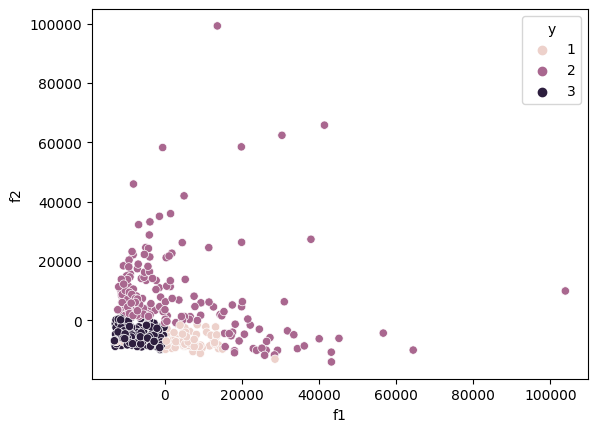

In [ ]:
df2 = pd.DataFrame(visual_1, columns=['f1', 'f2'])
df2['y'] = Y
print(pca.explained_variance_ratio_)
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

**Observe**

The data is non-linear, hence to correctly classify the data:
- We will require a deep Neural Network


Splitting Data into Train, Validation and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/550/original/0.png?1693575670" width="800">

Now that the data is ready, we can implement
- A NN model using [tensorflow keras](https://keras.io/api/)
- By creating 7 layered NN such that:

|Layer| |Descrption|
|:--| |:--|
|**L1**| |Is the Input Layer |
|**L2**| |Contains 32 Neurons|
|**L3**| |Contains 64 Neurons|
|**L4**| |Contains 128 Neurons|
|**L5**| |Contains 64 Neurons |
|**L6**| |Contains 32 Neurons|
|**L7**| |Is the Output Layer |
<br>

**Note:** In Between the layers, we will use:
- ReLU as the Activation function


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_baseline():

  model = Sequential([
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(128, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(3,activation='softmax')])
  return model

In [ ]:
model = create_baseline()

Using ```MiniBatch GD``` as Optimizer

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch=10 and batch size = 128

In [ ]:

history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=10, batch_size=128)


Epoch 1/10
3/3 [==============================] - 5s 102ms/step - loss: 1.0882 - val_loss: 1.0698
Epoch 2/10
3/3 [==============================] - 0s 15ms/step - loss: 1.0830 - val_loss: 1.0639
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 1.0778 - val_loss: 1.0578
Epoch 4/10
3/3 [==============================] - 0s 16ms/step - loss: 1.0727 - val_loss: 1.0516
Epoch 5/10
3/3 [==============================] - 0s 16ms/step - loss: 1.0676 - val_loss: 1.0457
Epoch 6/10
3/3 [==============================] - 0s 18ms/step - loss: 1.0628 - val_loss: 1.0400
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 1.0580 - val_loss: 1.0338
Epoch 8/10
3/3 [==============================] - 0s 16ms/step - loss: 1.0532 - val_loss: 1.0277
Epoch 9/10
3/3 [==============================] - 0s 16ms/step - loss: 1.0480 - val_loss: 1.0213
Epoch 10/10
3/3 [==============================] - 0s 16ms/step - loss: 1.0426 - val_loss: 1.0145


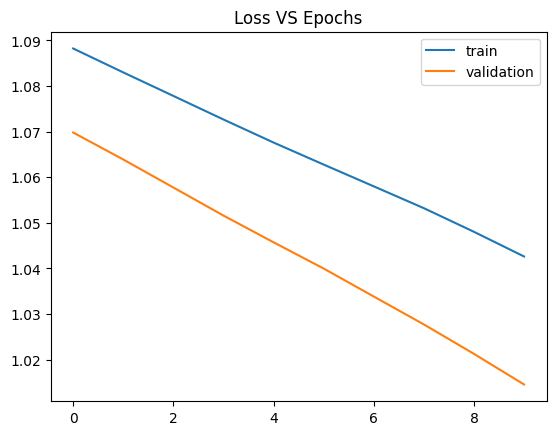

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

After 10 epochs the model still has a very high loss

<br>

#### What should be done to make the model perform better ?

Ans: increase the training epochs of the model

Lets now increase the epoch of model to 200

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=200, batch_size=128, verbose = 0)


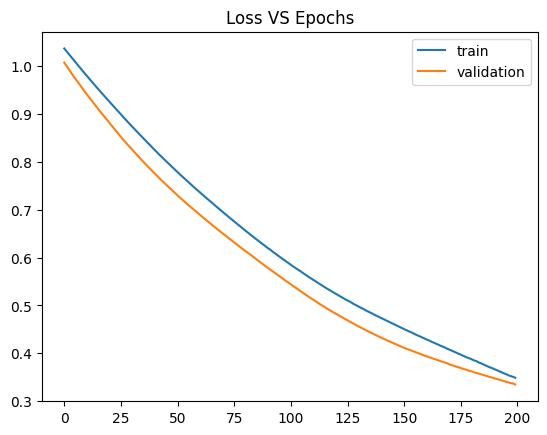

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**observe**

The model requires 210 epochs:
- For it to have such a low loss

Now imagine if the dataset has 5 million samples:
- The model will require a very high training epoch
- in order for it to reach global minima

This surely will be a huge drawback:
- While deploying the model

# Exponential Moving Average

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/560/original/0.png?1693577361" width="800">

#### Why Mini-Batch GD takes so many epochs ?
Ans: Mini-batch GD takes some steps ($V$) before reaching global minima

In many of these steps, the optimizer
- Tends to move in direction where it will never reach minima
- Hence due to all these noisy steps, the GD takes so many epochs

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/561/original/0.png?1693577419" width="800">

#### Why does mini-Batch GD have noisy steps ?
Ans: Because, training data is divided into batches
- And for some batch the model has very small loss
- while for a few batch, the loss is quite high
- Making the gradients of weights have high, low values
- Thus effecting the step of Mini-Batch GD optimizer

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/562/original/0.png?1693577474" width="800">



#### How to reduce the number of epochs during training of the model ?

Ans: By decreasing the number of steps ($V$) optimization algorithm takes to reach global minima.

<br>

#### How to reduce the steps $V$ required for the algorithm to reach global minima ?

If we combine these past steps taken by the optimizer:
-  for it to update the direction of step
- such that it moves towards global minima  





<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/563/original/0.png?1693577560" width="800">

#### Will combining the past steps taken by the optimizer help ?
Ans: Yes, to better understand this lets assume model trained for 3 iterations

Note: 1 iteration = ForwardProp + BackProp

#### What will be the value of $V_1$ ?
Ans: $V_1 = \beta V_0 + (1-\beta) Δ w_1$



#### What will be the value of $V_2$ ?
Ans: $V_2 = \beta V_1 + (1-\beta) Δ w_2$

- $V_2 =\beta^2 V_0 + \beta(1-\beta)Δ w_1+ (1-\beta) Δ w_2 $


#### What will be value of $V_3$ ?

Ans: $V_3 = \beta V_2 + (1-\beta) Δ w_3$

- $V_3 =\beta^3 V_0 + \beta^2(1-\beta)Δ w_1+ \beta(1-\beta) Δ w_2 + (1-\beta) Δ w_3  $




<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/564/original/0.png?1693577611" width="800">


Thus using **Exponential Moving Average**, the optimizer
- updates its direction according to its previous step taken.
- And smoothes out its current direction
- in order to reach global minima faster

#Graident Descent with Momentum

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/570/original/0.png?1693577894" width="800">

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/571/original/0.png?1693577940" width="800">

#### How does Gradient Descent implement Exponential Moving Average ?

Ans: for some iteration t and layer $k$ of the NN :
- after finding $dw^k$ and $db^k$,

the exopnential moving average is introduced:
- $V_{dw^k} = β \times V_{dw^k} + (1-β) \times dw^k $

Similarly:

- $V_{db^k} = β \times V_{db^k} + (1-β) \times db^k $

Hence Weight updation with learning rate $α$ becomes:
- $w^k = w^k -\alpha \times V_{dw^k}$

- $b^k = b^k -\alpha \times V_{db^k}$

<br>

**Note:** This approach can be analogous to a ball moving down a hill where:

- the gradients $dw^k $ and $db^k$ acts as acceleration
- the $V_{dw}$ and $V_{db}$ acts as velocity with which the ball is moving
- And the term $β$ acts as friction and helps prevent the ball from speeding up without limit

Hence we can say, as the ball rolls down, it gains **momentum**
- therefore this approach is called **Gradient Descent with Momentum**












Lets now implement Gradient Descent with momentum on our model

In [ ]:
model_gdm = create_baseline()

Using ```MiniBatch GD``` as Optimizer

In [ ]:
model_gdm.compile(optimizer = tf.keras.optimizers.SGD(momentum=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_gdm.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


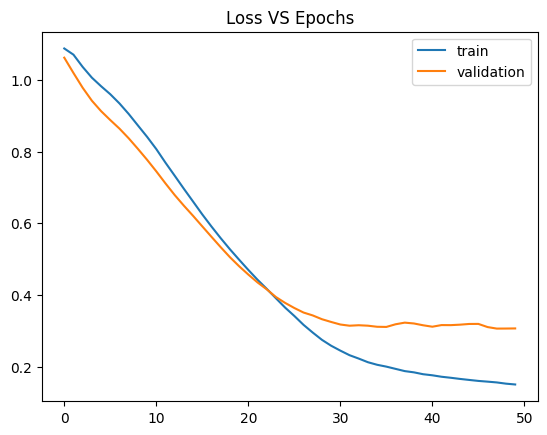

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

Just by using Momentum with Gradient Descent:
- The model was able to perform so much better in just 25 epochs



# RMSprop

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/575/original/0.png?1693578356" width="800">

This 25 epochs is still quite high for a real world training data

#### Is there a way to furthur reduce the training epoch for the model ?

Ans: Yes, as we know :
- optimizer tends to move in direction (osciallations) when gradient of weight is greater than the other
- Meaning $ Δb >>> Δw $

Hence to reduce this moving direction, lets say:

On some iteration t, we calculate $V_{dw} $ by squaring the gradients as:
- $V_{dw^k} = \beta V_{dw^k} + (1-β) (dw^k)^2 $
- $V_{db^k} = \beta V_{db^k} + (1-β) (db^k)^2 $


#### How is squaring useful ?
Ans: as gradients in which the optimizer moves is higher then:
- the square of the gradient will be much high
- thus making $V_{db^k} > V_{dw^k}$

<br>

Now during weight updation:

- $w^k = w^k - α \times \frac{dw^k}{\sqrt{V_{dw^k}+ ϵ} } $; where $ϵ$ is a very small value  $ = 10^{-8}$
- $b^k = b^k - α \times \frac{db^k}{\sqrt{V_{db^k}+ ϵ} } $

<br>

Since $V_{db^k} > V_{dw^k}$,
- meaning $\frac{1}{V_{dw^k}} > \frac{1}{V_{db^k}} $

Thus making the  optimizer to move more in the direction of $dw^k$:
- hence decreasing  osciallations of the optimizer

<br>

#### Why is epilson $ϵ$ added ?
Ans: To prevent the denominator to become 0:
- When $V_{dw}$ or $V_{db}$ is 0

<br>

**Note:** This approach is known as **RMSprop**





Implementing RMSProp

In [ ]:
model_rms = create_baseline()

Using ```RMSprop``` as Optimizer

In [ ]:
model_rms.compile(optimizer = tf.keras.optimizers.RMSprop(rho=0.9),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_rms.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


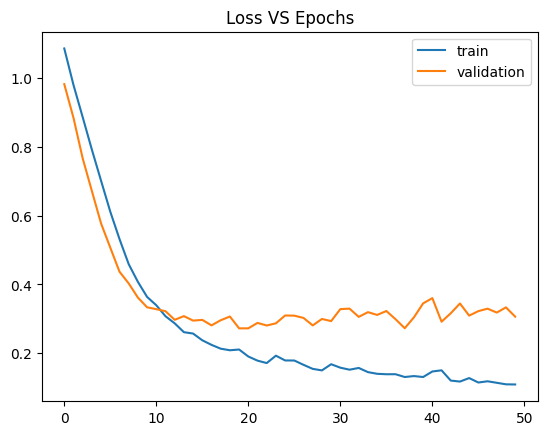

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**Observe**

Though RMSProp reaches minima within 10 training epochs:
- we see a lot of oscillations than Gradient Descent with momentum
- meaning the optimizer still takes steps in the direction not to the global minima


#Adam

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/584/original/0.png?1693581139" width="800">

#### is there a way to reduce these oscillations while still keeping the training epochs low ?

Ans: if we combine both RMSprop and momentum, this is done by an alogrithm called **Adam**

<br>

#### How does Adam work ?
Ans: Now for simplicity:
- Lets call RMSprop $V_{dw}, V_{db}$ as $S_{dw}, S_{db}$

Therefore now for some iteration t:
- We compute $dW$, $db$

then for Momentum we can say:

- $V_{dw^k} = \beta_1 V_{dw^k} + (1-\beta_1) dw^k $

Similarly,
- $V_{db^k} = \beta_1 V_{db^k} + (1-\beta_1) db^k $

<br>


After performing momentum ,RMSprop is calculated as:
- $S_{dw^k} = \beta_2 S_{dw^k} + (1-\beta_2) (dw^k)^2 $

Similarly
- $S_{db^k} = \beta_2 S_{db^k} + (1-\beta_2) (db^k)^2 $

<br>




<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/567/original/0.png?1693577845" width="800">

As momentum and RMSprop both averages out,  the steps taken by Optimizer,
- then for step:$V_3$, the average out value is more influenced by $V_0, V_1, V_2$
- which makes the average value of $V_3$ biased and far away from the actual $V_3$

<br>

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/585/original/0.png?1693581217" width="800">




#### How to prevent this biasness ?
Ans: it is done by dividing $V_{dw^k}$, $V_{db^k}$ by:
- $V^{corrected}_{dw^k} = \frac{V_{dw^k}}{1-β_1^t}$

Similarly:
- $V^{corrected}_{db^k} = \frac{V_{db^k}}{1-β_1^t}$

and for RMSprop:

- $S^{corrected}_{dw^k} = \frac{S_{dw^k}}{1-β_2^t}$

Similarly:
- $S^{corrected}_{db^k} = \frac{S_{db^k}}{1-β_2^t}$

**Note:** this process is called as **Bias Correction**


<br>

Now finally, weights updation is performed:

- $w^k = w^k - α \times  \frac{1}{\sqrt{S^{corrected}_{dw}+ ϵ}} \times V^{corrected}_{dw}$

- $b^k = b^k - α \times  \frac{1}{\sqrt{S^{corrected}_{db}+ ϵ}} \times V^{corrected}_{db}$








Implementing Adam

In [ ]:
model_adam = create_baseline()

Using ```Adam``` as Optimizer

In [ ]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


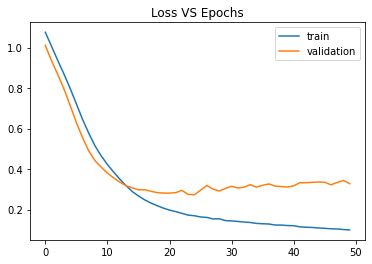

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



#### Learning Rate Decay

**Observe**

How using Adam algorithm,
- the oscillations are reduced drastically
- also the model takes almost 12 epochs for it to show accruate results
- But the model performance on the validation is still high

<br>

#### Is there a way to improve model performance  ?

Ans: recall how optimizer tends on moving around the global minima:
- if the learning rate is high

#### Will a learning rate of 0.01 high for our problem ?
Ans: As using different Optimizers,
- The validation loss moves around 0.4
- it means the optimizer is stuck around the global minima


#### But what happens if learning rate is smaller ?
Ans: The number of steps increases
- And the model will require more epochs to reach global minima

<br>

#### How to make optimizer take small number of steps and still reach global minima ?

Ans: what if we keep a high learning rate intially ($\alpha_0$)
- and Learning rate decreases with each epoch($e$) by a rate $r_0$

This is called as Learning rate decay, defined as:
- for epoch in epochs:
- $\alpha = \frac{1}{1 + r_0 \times epoch } \times \alpha_0 $
- $\alpha_0 = \alpha $

<br>

#### When to implement Learning rate decay, should it be done before or after an epoch ?
Ans: After an epoch by using:
- Tensorflow callback

<br>

Lets now implement Learning Rate decay using [LearningRateScheduler](https://keras.io/api/callbacks/learning_rate_scheduler/)



In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

defining the Learning Rate decay

In [ ]:
def scheduler(epoch, lr):
  r_0 = 0.01
  lr = (1/(1+r_0*epoch))*lr

  return lr

In [ ]:
LRdecay = LearningRateScheduler(scheduler)

In [ ]:
model_adam = create_baseline()

Using ```Adam``` as Optimizer

In [ ]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128,callbacks=[LRdecay], verbose = 0)


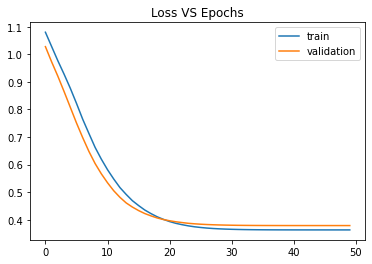

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**observe**

How by using Learning Rate decay,
- the model reaches a loss of around 0.3 now
- Showing that reducing the Learning Rate did help improve model performance




### Simulation for Momentum, RMSprop and Adam





<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/045/662/original/demo-surface_%281%29.gif?1693662781" width="800">




[Visualization software](https://github.com/lilipads/gradient_descent_viz) for simulation purpose
- **Works locally**

**observe**

- How momentum quickly reaches minima due to the exponential moving average


Also Adam takes a few iteration before reaching minima

- Showing how it uses both the RMSprop and Momentum in order to find the global minima

In [ ]:
|